<IPython.core.display.Javascript object>

In [56]:
from pandas import read_csv

output_fpath = relations_fpath + "-pairs.out"


df = read_csv(relations_fpath, sep="\t", encoding='utf8', error_bad_lines=False)

df = df[df["hypo2hyper_substract"].abs()>0]
df = df.sort_values(by=["hypo2hyper_substract"],ascending=[0])
df = df[["hyponym","hypernym","correct","hypo2hyper","hyper2hypo","hypo2hyper_substract"]]
df.to_csv(output_fpath, sep="\t", encoding="utf-8", float_format='%.6f', index=False)
print output_fpath
df

/home/panchenko/taxo/semeval/semeval/wac/relations-ai.csv-pairs.out


,hyponym,hypernym,correct,hypo2hyper,hyper2hypo,hypo2hyper_substract
3539,probabilistic reasoning,reasoning,1,1.00000,0.00000,1.00000
665,boolean algebra,logic,1,1.00000,0.00000,1.00000
2732,math,science,1,1.00000,0.00000,1.00000
946,computing system,system,1,1.00000,0.00000,1.00000
900,computational complexity,computer science,1,1.00000,0.00000,1.00000
868,complexity,measure,1,1.00000,0.00000,1.00000
866,complex,structure,0,1.00000,0.00000,1.00000
810,cognitive psychology,discipline,1,1.00000,0.00000,1.00000
648,binary tree,data structure,1,1.00000,0.00000,1.00000
342,analogical reasoning,reasoning,1,1.00000,0.00000,1.00000


In [ ]:
%matplotlib inline

from jnt.isas.taxo import TaxonomyFeatures, TaxonomyResources
from jnt.isas.predictors import TaxonomyPredictor

freq_fpaths = [""]


relations_fpaths = ["/home/panchenko/taxo/semeval/semeval/wac/relations-ai.csv",
                    "/home/panchenko/taxo/semeval/semeval/wac/relations-plants.csv",
                    "/home/panchenko/taxo/semeval/semeval/wac/relations-vehicles.csv"]

isas_fpaths = ["/home/panchenko/taxo/patternsim/PatternSim/patternsim/wac/output-ai-en/pairs-isas.csv",
               "/home/panchenko/taxo/patternsim/PatternSim/patternsim/wac/output-ai-en-perp/pairs-isas.csv",
               "/home/panchenko/taxo/patternsim/PatternSim/patternsim/wac/output-ai-en-nf/pairs-isas.csv",
               "/home/panchenko/taxo/patternsim/PatternSim/patternsim/wac/output-plants-en/pairs-isas.csv",
               "/home/panchenko/taxo/patternsim/PatternSim/patternsim/wac/output-plants-en-perp/pairs-isas.csv",
               "/home/panchenko/taxo/patternsim/PatternSim/patternsim/wac/output-plants-en-nf/pairs-isas.csv",
               "/home/panchenko/taxo/patternsim/PatternSim/patternsim/wac/output-vehicles-en/pairs-isas.csv",
               "/home/panchenko/taxo/patternsim/PatternSim/patternsim/wac/output-vehicles-en-perp/pairs-isas.csv",
               "/home/panchenko/taxo/patternsim/PatternSim/patternsim/wac/output-vehicles-en-nf/pairs-isas.csv",
               "/home/panchenko/taxo/patternsim/PatternSim/patternsim/wac/output-wikipedia/pairs-isas.csv"]


def evaluate(isas_fpath, relations_fpath):
    taxo_res = TaxonomyResources(freq_fpaths, isas_fpath)
    taxo_features = TaxonomyFeatures(taxo_res, relations_fpath=relations_fpath)
    taxo_features.fill_direct_isas(subphrases=False)
    taxo_features.hypo2hyper_ratio()
    taxo_pred = TaxonomyPredictor(taxo_features)
    taxo_pred.predict_by_global_threshold(threshold=0.0, field="hypo2hyper_substract")
    taxo_pred.evaluate("hypo2hyper_substract")


for relations_fpath in relations_fpaths:
    for isas_fpath in isas_fpaths:
        print relations_fpath.upper(), "\n", isas_fpath.upper(), "\n", "*"*50, "\n", "*"*50
        evaluate([isas_fpath], relations_fpath)

Loading spacy model...
Error: cannot create TreeTagger
Traceback (most recent call last):
  File "jnt/morph.py", line 44, in <module>
    _treetagger_fr = TreeTagger(encoding='utf-8',language='french')
  File "/home/panchenko/.env/lib/python2.7/site-packages/treetagger.py", line 121, in __init__
    verbose=verbose)
  File "/home/panchenko/.env/lib/python2.7/site-packages/nltk/internals.py", line 535, in find_binary
    binary_names, url, verbose))
  File "/home/panchenko/.env/lib/python2.7/site-packages/nltk/internals.py", line 529, in find_binary_iter
    url, verbose):
  File "/home/panchenko/.env/lib/python2.7/site-packages/nltk/internals.py", line 500, in find_file_iter
    raise LookupError('\n\n%s\n%s\n%s' % (div, msg, div))
LookupError: 

NLTK was unable to find the tree-tagger-french file!
Use software specific configuration paramaters or set the TREETAGGER environment variable.

  Searched in:
    - .
    - /usr/bin
    - /usr/local/bin
    - /opt/local/bin
    - /Application

Loading relations file: /home/panchenko/joint/data/isas/semeval/super/new-relations-en12.csv
Loaded 131432 relations from: /home/panchenko/joint/data/isas/semeval/super/new-relations-en12.csv
Loaded 3388 voc from relations

HYPER_IN_HYPO_I 
correct: 129025
all: 131432
accuracy: 0.982
             precision    recall  f1-score   support

          0       0.98      1.00      0.99    128183
          1       0.91      0.29      0.44      3249

avg / total       0.98      0.98      0.98    131432



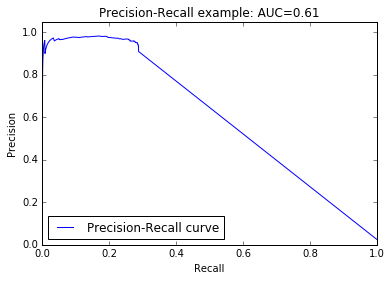


HYPO2HYPER_SUBSTRACT 
correct: 128071
all: 131432
accuracy: 0.974
             precision    recall  f1-score   support

          0       0.98      0.99      0.99    128183
          1       0.45      0.17      0.24      3249

avg / total       0.97      0.97      0.97    131432



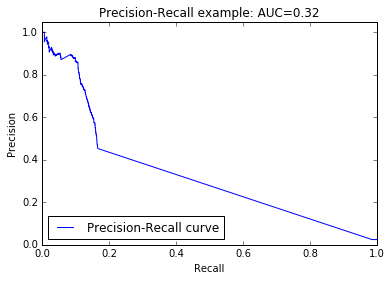


HYPO2HYPER 
correct: 128071
all: 131432
accuracy: 0.974
             precision    recall  f1-score   support

          0       0.98      0.99      0.99    128183
          1       0.45      0.17      0.24      3249

avg / total       0.97      0.97      0.97    131432



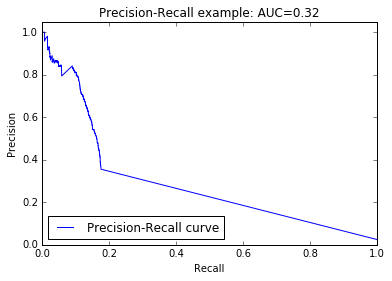


HYPO2HYPER2 
correct: 128003
all: 131432
accuracy: 0.974
             precision    recall  f1-score   support

          0       0.98      0.99      0.99    128183
          1       0.43      0.16      0.23      3249

avg / total       0.97      0.97      0.97    131432



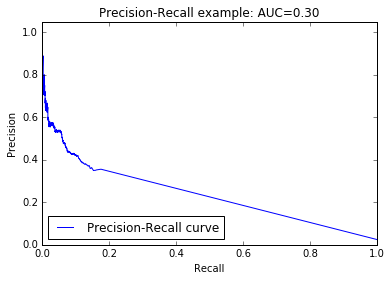


HYPO2HYPER3 
correct: 128091
all: 131432
accuracy: 0.975
             precision    recall  f1-score   support

          0       0.98      1.00      0.99    128183
          1       0.46      0.17      0.24      3249

avg / total       0.97      0.97      0.97    131432



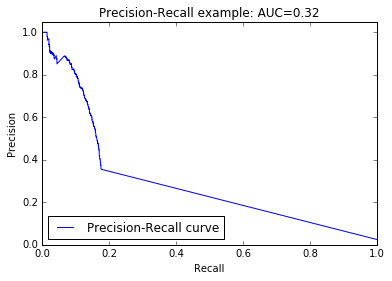


HYPO2HYPER_S 
correct: 127563
all: 131432
accuracy: 0.971
             precision    recall  f1-score   support

          0       0.98      0.99      0.98    128183
          1       0.36      0.24      0.28      3249

avg / total       0.97      0.97      0.97    131432



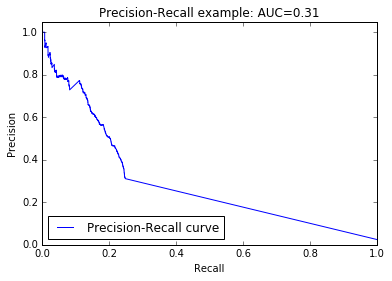


HYPO2HYPER2_S 
correct: 127499
all: 131432
accuracy: 0.970
             precision    recall  f1-score   support

          0       0.98      0.99      0.98    128183
          1       0.34      0.23      0.28      3249

avg / total       0.96      0.97      0.97    131432



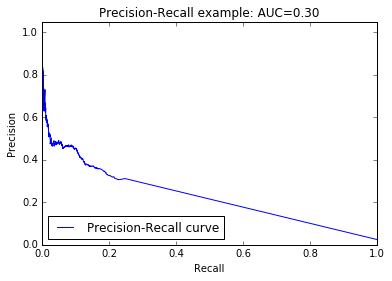


HYPO2HYPER3_S 
correct: 127583
all: 131432
accuracy: 0.971
             precision    recall  f1-score   support

          0       0.98      0.99      0.99    128183
          1       0.36      0.24      0.29      3249

avg / total       0.97      0.97      0.97    131432



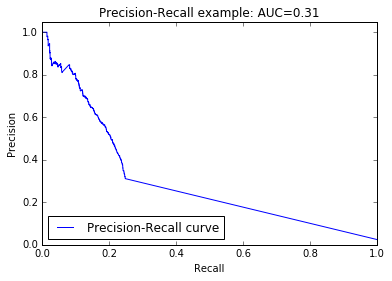


HYPO2HYPER_MAX2 
correct: 126891
all: 131432
accuracy: 0.965
             precision    recall  f1-score   support

          0       0.98      0.98      0.98    128183
          1       0.29      0.29      0.29      3249

avg / total       0.96      0.97      0.97    131432



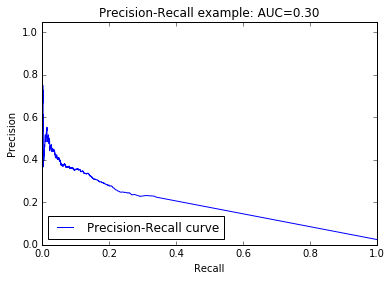


HYPO2HYPER_MEAN2 
correct: 127742
all: 131432
accuracy: 0.972
             precision    recall  f1-score   support

          0       0.98      0.99      0.99    128183
          1       0.35      0.15      0.21      3249

avg / total       0.96      0.97      0.97    131432



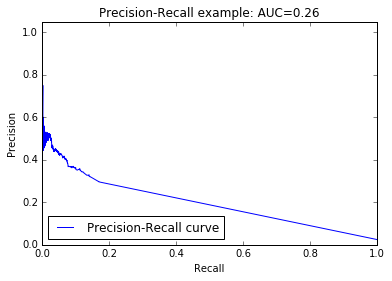


HYPO2HYPER_MA 
correct: 128233
all: 131432
accuracy: 0.976
             precision    recall  f1-score   support

          0       0.98      1.00      0.99    128183
          1       0.70      0.03      0.05      3249

avg / total       0.97      0.98      0.96    131432



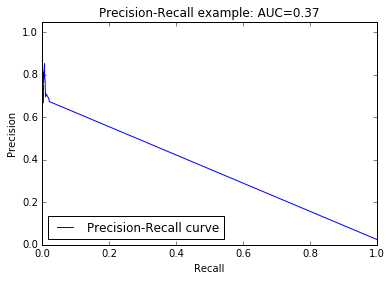


OUT DEGREES NUM_MA 
correct: 110823
all: 131432
accuracy: 0.843
             precision    recall  f1-score   support

          0       0.99      0.85      0.91    128183
          1       0.11      0.75      0.19      3249

avg / total       0.97      0.84      0.90    131432


OUT DEGREES WEIGHT_MA 
correct: 110727
all: 131432
accuracy: 0.842
             precision    recall  f1-score   support

          0       0.99      0.84      0.91    128183
          1       0.11      0.75      0.19      3249

avg / total       0.97      0.84      0.89    131432


IN DEGREES NUM_MA 
correct: 115242
all: 131432
accuracy: 0.877
             precision    recall  f1-score   support

          0       0.99      0.88      0.93    128183
          1       0.14      0.77      0.23      3249

avg / total       0.97      0.88      0.92    131432


IN DEGREES WEIGHT_MA 
correct: 115198
all: 131432
accuracy: 0.876
             precision    recall  f1-score   support

          0       0.99      0.88     

In [2]:
Important_do_not_delete

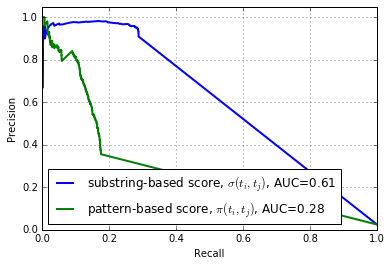

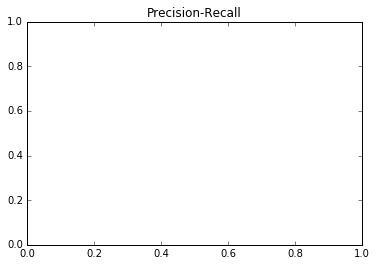

In [3]:
%matplotlib inline

import matplotlib
from jnt.isas.taxo import TaxonomyFeatures, TaxonomyResources
from jnt.isas.predictors import TaxonomyPredictor
from jnt.isas.predictors import *

# relations_fpath = "/home/panchenko/joint/data/isas/semeval/super/new-relations-en12.csv"
# freq_fpaths = ["/home/panchenko/joint/data/isas/semeval/data/freq-59g-mwe62m.csv.gz"]
# isa_fpaths = ["/home/panchenko/joint/data/isas/semeval/data/ma.csv.gz"]
#               #"/home/panchenko/joint/data/isas/semeval/data/pm.csv.gz",
#               #"/home/panchenko/joint/data/isas/semeval/data/ps.csv.gz"]

# taxo_res = TaxonomyResources(freq_fpaths, isa_fpaths)
# taxo_features = TaxonomyFeatures(taxo_res, relations_fpath=relations_fpath)
# taxo_pred = TaxonomyPredictor(taxo_features)




relations = taxo_pred._relations

name = "hyper_in_hypo_i"
taxo_pred.predict_by_global_threshold(threshold=0.0, field="hyper_in_hypo_i")

# print "correct:", sum(relations.correct == relations.correct_predict)
# print "all:", len(relations)
# print "accuracy: %.3f" % (sum(relations.correct == relations.correct_predict)/float(len(relations)))
# print classification_report(relations.correct, relations.correct_predict)
# auc = average_precision_score(relations.correct, relations.correct_predict)
# print auc

precision, recall, thresholds = precision_recall_curve(relations.correct, relations[name])
plt.clf()
plt.plot(recall, precision, label='substring-based score, $\sigma(t_i, t_j)$, AUC={0:0.2f}'.format(0.61),
        linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])


name = "hypo2hyper"
taxo_pred.predict_by_global_threshold(threshold=0.0, field=name)

# print "correct:", sum(relations.correct == relations.correct_predict)
# print "all:", len(relations)
# print "accuracy: %.3f" % (sum(relations.correct == relations.correct_predict)/float(len(relations)))
# print classification_report(relations.correct, relations.correct_predict)
# auc = average_precision_score(relations.correct, relations.correct_predict)
# print auc

precision, recall, thresholds = precision_recall_curve(relations.correct, relations[name])
auc = average_precision_score(relations.correct, relations.correct_predict)
plt.plot(recall, precision, label='pattern-based score, $\pi(t_i, t_j)$, AUC={0:0.2f}'.format(0.28), linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.legend(loc="lower left")
# font = {'family' : 'normal',
#         'size'   : 12}
# matplotlib.rc('font', **font)
plt.grid()
plt.show()





correct: 129025
all: 131432
accuracy: 0.982
             precision    recall  f1-score   support

          0       0.98      1.00      0.99    128183
          1       0.91      0.29      0.44      3249

avg / total       0.98      0.98      0.98    131432

0.607459996014


correct: 127719
all: 131432
accuracy: 0.972
             precision    recall  f1-score   support

          0       0.98      0.99      0.99    128183
          1       0.36      0.18      0.24      3249

avg / total       0.96      0.97      0.97    131432

0.275831828739

True True
True True
True True


In [20]:
import pandas as pd 
pd.set_option('display.max_rows', 500)

df = taxo_features.relations.copy()
#df = df[["hyponym","hypernym","hypo_in_hyper","hyper_in_hypo","correct"]]
#df["hypo2hyper_substr"] = df["hyper_in_hypo"] - df["hypo_in_hyper"]
#df["hyper_in_hypo_i"] = 1 / df["hyper_in_hypo"] 
#df.replace()
#df = df[df["hypo_in_hyper"] == 0]
df = df.sort(["hypo2hyper_substract"], ascending=0)
df = df[df["hypo2hyper"]>0]
df = df[["hyponym","hypernym","hypo2hyper","hypo2hyper_substract","correct"]]
#df = df[df["correct"] == 0]
df
#df = df[["hyponym","hypernym","hypo_in_hyper","hyper_in_hypo","hyper_in_hypo_i","correct"]]
#df

,hyponym,hypernym,hypo2hyper,hypo2hyper_substract,correct
20910,coriander,herb,1.00000,1.00000,1
2394,alder,tree,1.00000,1.00000,1
28372,density,property,1.00000,1.00000,1
71237,parsnip,vegetable,1.00000,1.00000,0
55321,linden,tree,1.00000,1.00000,1
160,acacia,tree,1.00000,1.00000,1
13854,celery,vegetable,1.00000,1.00000,0
67805,okra,vegetable,1.00000,1.00000,0
9497,birch,tree,1.00000,1.00000,1
29752,dill,herb,1.00000,0.99908,1
